# Website data is from:

https://www.kaggle.com/rhammell/ships-in-satellite-imagery




# Goal of Dataset

This Dataset contains 4000 images that are are colored. The images are 80x80 which means the dataset contains 4000 images that are 80x80x3 in dimensions. 1000 of those images contain ships, and the other 3000 contain images of water or landscapes. The goal of the dataset is to predict whether an image contains a ship (1) or no ship (0). 

# Import Tools

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_openml
import umap
!pip install umap-learn
from sklearn.datasets import fetch_openml
import umap
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import special
from scipy.special import comb
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import yeojohnson
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import imshow
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import time
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn import ensemble
from scipy.stats.mstats import winsorize
import warnings
from scipy import stats
from sklearn import tree
from sklearn import neighbors
!pip install pydotplus
!pip install graphviz
from IPython.display import HTML
import base64
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from IPython.display import HTML
import base64
from smart_open import open
import io
from google.colab import files
# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
import urllib.request  # the lib that handles the url stuff
import seaborn as sns
from scipy import stats
from IPython.display import HTML
import base64
from smart_open import open
import io
from google.colab import files
from PIL import Image, ImageDraw 
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# upload files and save to ship_df

In [2]:
uploaded = files.upload()

Saving 0__20150718_184300_090b__-122.38458613431831_37.763521076612484.png to 0__20150718_184300_090b__-122.38458613431831_37.763521076612484.png
Saving 0__20150718_184300_090b__-122.40477488428849_37.8071040053892.png to 0__20150718_184300_090b__-122.40477488428849_37.8071040053892.png
Saving 0__20160622_170157_0c64__-122.485753590087_37.835957669247584.png to 0__20160622_170157_0c64__-122.485753590087_37.835957669247584.png
Saving 0__20160622_170157_0c64__-122.4478291812287_37.892486779170426.png to 0__20160622_170157_0c64__-122.4478291812287_37.892486779170426.png
Saving 0__20160622_170157_0c64__-122.34466653421043_37.78296341833453.png to 0__20160622_170157_0c64__-122.34466653421043_37.78296341833453.png
Saving 0__20160704_204236_0c41__-122.19041500809534_37.8972978006019.png to 0__20160704_204236_0c41__-122.19041500809534_37.8972978006019.png
Saving 1__20160710_182140_0c78__-122.33831761096032_37.75756506843916.png to 1__20160710_182140_0c78__-122.33831761096032_37.75756506843916.

In [0]:
img_pil1 = Image.open('0__20150718_184300_090b__-122.38458613431831_37.763521076612484.png')
img_pil2 = Image.open('0__20150718_184300_090b__-122.40477488428849_37.8071040053892.png')
img_pil3 = Image.open('0__20160622_170157_0c64__-122.485753590087_37.835957669247584.png')
img_pil4 = Image.open('0__20160622_170157_0c64__-122.4478291812287_37.892486779170426.png')
img_pil5 = Image.open('0__20160622_170157_0c64__-122.34466653421043_37.78296341833453.png')
img_pil6= Image.open('1__20160710_182140_0c78__-122.33831761096032_37.75756506843916.png')
img_pil7 = Image.open('1__20160820_233143_0c53__-122.34423626076213_37.75067606773978.png')
img_pil8 = Image.open('1__20160820_233143_0c53__-122.34722781164949_37.75902080540278.png')
img_pil9 = Image.open('1__20160820_233143_0c53__-122.34848736520453_37.77073581030887.png')
img_pil10 = Image.open('1__20160820_233143_0c53__-122.35919454301921_37.79310192735754.png')


In [0]:
ship_df = pd.read_json('shipsnet.json')

# print the keys of the dictionary, and the description of the dataframe

In [5]:
print('the keys of the json file are: \n {} ' .format(ship_df.keys()))
print('\n\n')
print(ship_df.info())

the keys of the json file are: 
 Index(['data', 'labels', 'locations', 'scene_ids'], dtype='object') 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB
None


# Create 2 dataframes of the labels, and the image data. 

## Output_df will be the labels. There are 2 labels: 0 for no ships, and 1 for ships.

In [6]:
output_df = ship_df['labels']
output_dim = 2
#print(output_df)
Y = to_categorical(output_df, output_dim)
print(Y.shape)

(4000, 2)


## Input will be the Red Green Blue image dataset. Check to see if it contains data for 80x80 images (6400) , for each of the 3 colors. This adds up to 19200 datapoints 

In [0]:
input_df = ship_df['data']

Want to create a numpy array to work with reshaping function

In [0]:
input_df = input_df.apply(lambda x: pd.Series(x))

In [0]:
input_df2 = input_df.to_numpy()

In [10]:
type(input_df2)

numpy.ndarray

Expected length of data should be 80x80x3 or 19200.

In [11]:
len(input_df2[1])

19200

for images create a new reshaped dataframe thats 80x80x3

In [12]:
picture = input_df2[3543]
picture.shape

(19200,)

Now reshape the X dataset for model. Also normalize the data by dividing by 255. This is the amount of shades in each color scale. 

In [0]:
input_dim = 19200 # 80*80*3 (RGB arrays)
output_dim = nb_classes = 1
nb_epoch = 20

X = input_df2.reshape(4000, input_dim)
X= X.astype('float32')
X /= 255 


The shape of our two data frames should be 4000 x 2 and 4000 x 19200 (output and image array)

In [14]:
print(X.shape)
print(Y.shape)


(4000, 19200)
(4000, 2)


# Here are samples of the two image types: 


1.   Images without ships (label = 0 ) 
2.   Images with ships (label = 1 ) 



Sample Pictures of images with no ships (Label = 0)


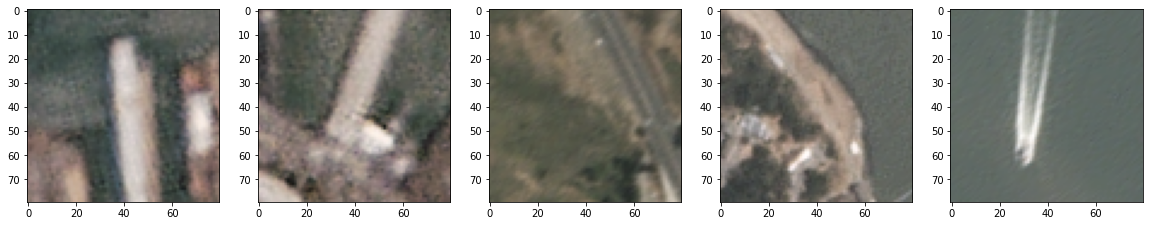



Sample Pictures of images with  ships (Label = 1)


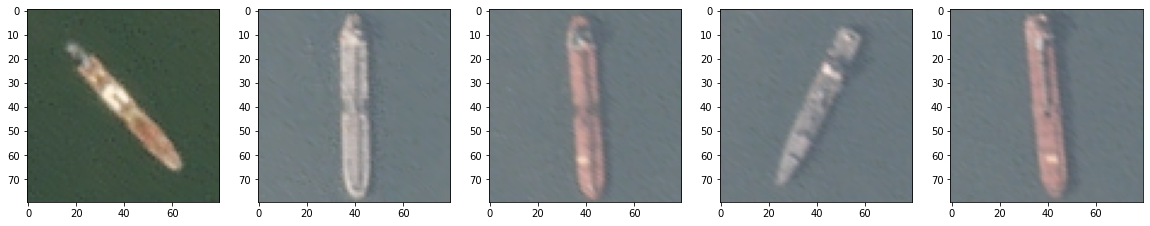

In [15]:
i = 1
k = 1 
plt.figure(figsize = (20,20))
print('Sample Pictures of images with no ships (Label = 0)')
plt.subplot(1,5,1)
plt.imshow(img_pil1)
plt.subplot(1,5,2)
plt.imshow(img_pil2)
plt.subplot(1,5,3)
plt.imshow(img_pil3)
plt.subplot(1,5,4)
plt.imshow(img_pil4)
plt.subplot(1,5,5)
plt.imshow(img_pil5)
plt.show()
plt.figure(figsize = (20,20))
print('\n\nSample Pictures of images with  ships (Label = 1)')
plt.subplot(1,5,1)
plt.imshow(img_pil6)
plt.subplot(1,5,2)
plt.imshow(img_pil7)
plt.subplot(1,5,3)
plt.imshow(img_pil8)
plt.subplot(1,5,4)
plt.imshow(img_pil9)
plt.subplot(1,5,5)
plt.imshow(img_pil10)
plt.show()

as you  can see the images contain 

# Now let us start training models, and seeing how tuning the parameters affects overall accuracy/score

Split the data into test/training sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=40)

First Let us try a different amount of layers, and see how each activation parameter works with each case.

First a 2 layer model: 

You can see that the ranking of accuracy/loss of the activation parameters is  tanh ,  relu, then sigmoid.

In [0]:
score_1 = []
accuracy = []
y = ['relu','tanh','sigmoid']
for n in y:
  model = Sequential()
  # our first dense layer
  model.add(Dense(128, input_shape=(19200,), activation=n))
  # our second dense layer
  model.add(Dense(64, activation=n))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])
 

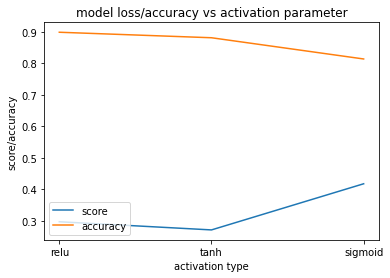

[0.29661568999290466, 0.2706528604030609, 0.41739192605018616] [0.8991666436195374, 0.8816666603088379, 0.8141666650772095]


In [18]:
# summarize history for loss
plt.plot(y,score_1)
plt.plot(y,accuracy)
plt.title('model loss/accuracy vs activation parameter')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower left')
plt.xlabel('activation type')
plt.show()
print(score_1,accuracy)

Now we should do a 3 layer model.



You can see that the ranking of accuracy/loss of the activation parameters is relu , tanh , then sigmoid. The accuracies and losses seem to be better than the 2 layer model.

In [0]:
score_1 = []
accuracy = []
y = ['relu','tanh','sigmoid']
for n in y:
  model = Sequential()
  # our 1st dense layer
  model.add(Dense(256, input_shape=(19200,), activation=n))
  # our 2nd dense layer
  model.add(Dense(128, input_shape=(19200,), activation=n))
  # our 3rd dense layer
  model.add(Dense(64, activation=n))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])



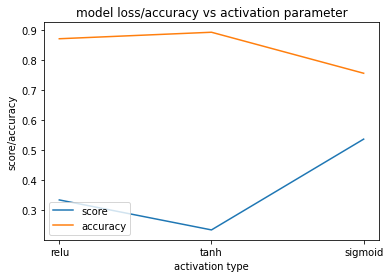

[0.33457812666893005, 0.23464299738407135, 0.537159264087677] [0.871666669845581, 0.8933333158493042, 0.7566666603088379]


In [20]:
# summarize history for loss
plt.plot(y,score_1)
plt.plot(y,accuracy)
plt.title('model loss/accuracy vs activation parameter')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower left')
plt.xlabel('activation type')
plt.show()
print(score_1,accuracy)

Now to try a 4 layer model

As you can see the accuracies and loss is worse than the 3 layer model. 

In [0]:
score_1 = []
accuracy = []
y = ['relu','tanh','sigmoid']
for n in y:
  model = Sequential()
  # our 1st dense layer
  model.add(Dense(512, input_shape=(19200,), activation=n))
  # our 2nd dense layer
  model.add(Dense(256, input_shape=(19200,), activation=n))
  # our 3rd dense layer
  model.add(Dense(128, input_shape=(19200,), activation=n))
  # our 4th dense layer
  model.add(Dense(64, activation=n))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])



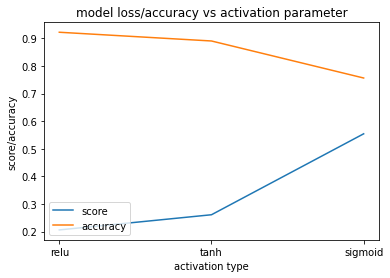

[0.20627076923847198, 0.26122844219207764, 0.5545178055763245] [0.9225000143051147, 0.89083331823349, 0.7566666603088379]


In [22]:
# summarize history for loss
plt.plot(y,score_1)
plt.plot(y,accuracy)
plt.title('model loss/accuracy vs activation parameter')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower left')
plt.xlabel('activation type')
plt.show()
print(score_1,accuracy)

Lastly, try a 5 layer model.

Again it looks like the 3 layer model did the best. Here the rankings went from tanh, relu, then sigmoid.

In [0]:
score_1 = []
accuracy = []
y = ['relu','tanh','sigmoid']
for n in y:
  model = Sequential()
  # our 1st dense layer
  model.add(Dense(1024, input_shape=(19200,), activation=n))
  # our 2nd dense layer
  model.add(Dense(512, input_shape=(19200,), activation=n))
  # our 3rd dense layer
  model.add(Dense(256, input_shape=(19200,), activation=n))
  # our 4th dense layer
  model.add(Dense(128, input_shape=(19200,), activation=n))
  # our 5th dense layer
  model.add(Dense(64, activation=n))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])


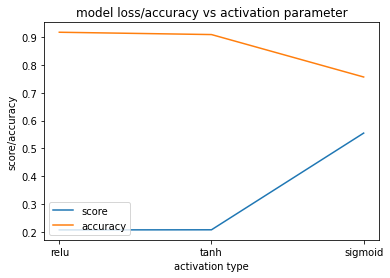

[0.20719106495380402, 0.20761419832706451, 0.5551013350486755] [0.9175000190734863, 0.909166693687439, 0.7566666603088379]


In [24]:
# summarize history for loss
plt.plot(y,score_1)
plt.plot(y,accuracy)
plt.title('model loss/accuracy vs activation parameter')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower left')
plt.xlabel('activation type')
plt.show()
print(score_1,accuracy)

Now that a 5 layer model using "relu" activation is deemed the best. We should now test other parameters.

Now let us look at changes in batchsize.

In [0]:
score_1 = []
accuracy = []
y = [50, 100 , 150, 200 , 250 , 300,512,750,1000]
for n in y:
  model = Sequential()
  model = Sequential()
  # our 1st dense layer
  model.add(Dense(1024, input_shape=(19200,), activation='relu'))
  # our 2nd dense layer
  model.add(Dense(512, input_shape=(19200,), activation='relu'))
  # our 3rd dense layer
  model.add(Dense(256, input_shape=(19200,), activation='relu'))
  # our 4th dense layer
  model.add(Dense(128, input_shape=(19200,), activation='relu'))
  # our 5th dense layer
  model.add(Dense(64, activation="relu"))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=n, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])
  

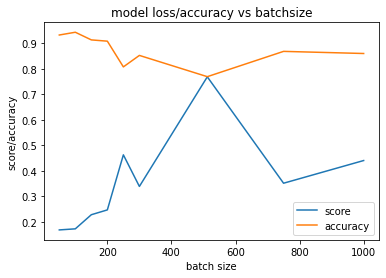

[0.1683669239282608, 0.17260022461414337, 0.22796908020973206, 0.24684366583824158, 0.46265944838523865, 0.33884602785110474, 0.7685347199440002, 0.35144877433776855, 0.4403839707374573] [0.9325000047683716, 0.9433333277702332, 0.9133333563804626, 0.9083333611488342, 0.8075000047683716, 0.8525000214576721, 0.7691666483879089, 0.8683333396911621, 0.8600000143051147]


In [26]:
# summarize history for loss
plt.plot(y,score_1)
plt.plot(y,accuracy)
plt.title('model loss/accuracy vs batchsize')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower right')
plt.xlabel('batch size')
plt.show()
print(score_1,accuracy)

Looks like the scores seem best at 50

Now check to check changes in learning rate

In [0]:
from tensorflow.keras import optimizers
sgd_001 = optimizers.SGD(lr=0.0001)
sgd_100 = optimizers.SGD(lr=.001)
sgd_01 = optimizers.SGD(lr=0.01)
sgd_5 = optimizers.SGD(lr=0.07)
y = [sgd_001,sgd_100,sgd_01,sgd_5]
y2 = ['0.0001','.001','0.01','0.7']

In [0]:
score_1 = []
accuracy = []
for n in y:
  model = Sequential()
  model = Sequential()
  # our 1st dense layer
  model.add(Dense(1024, input_shape=(19200,), activation='relu'))
  # our 2nd dense layer
  model.add(Dense(512, input_shape=(19200,), activation='relu'))
  # our 3rd dense layer
  model.add(Dense(256, input_shape=(19200,), activation='relu'))
  # our 4th dense layer
  model.add(Dense(128, input_shape=(19200,), activation='relu'))
  # our 5th dense layer
  model.add(Dense(64, activation="relu"))
  # last layer is the output layer.
  model.add(Dense(2, activation="softmax"))

  model.compile(optimizer=n, loss='categorical_crossentropy',
              metrics=['accuracy'])
  t = model.fit(X_train, y_train, batch_size=50, epochs=20, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])
  score_1.append(score[0])
  

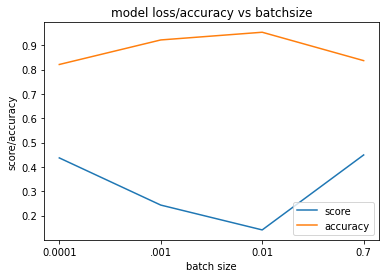

[0.43691086769104004, 0.24305526912212372, 0.14095914363861084, 0.44905567169189453] [0.8208333253860474, 0.92166668176651, 0.95333331823349, 0.8366666436195374]


In [29]:
# summarize history for loss
plt.plot(y2,score_1)
plt.plot(y2,accuracy)
plt.title('model loss/accuracy vs batchsize')
plt.ylabel('score/accuracy')
plt.legend(['score', 'accuracy'], loc='lower right')
plt.xlabel('batch size')
plt.show()
print(score_1,accuracy)

Looks like a learning rate around 0.01 does the best out for the model, however when no learning rate is chosen the model picks one that gives an accuracy higher then all of these. So it will not be included in the model.

# BASED ON ABOVE ANALYSIS THIS IS MODEL CHOSEN

In [30]:
score_1 = []
accuracy = []
model = Sequential()
# our 1st dense layer
model.add(Dense(1024, input_shape=(19200,), activation='relu'))
# our 2nd dense layer
model.add(Dense(512, input_shape=(19200,), activation='relu'))
# our 3rd dense layer
model.add(Dense(256, input_shape=(19200,), activation='relu'))
# our 4th dense layer
model.add(Dense(128, input_shape=(19200,), activation='relu'))
# our 5th dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=sgd_01, loss='categorical_crossentropy',
              metrics=['accuracy'])
t = model.fit(X_train, y_train, batch_size=50, epochs=20, verbose=0)

score = model.evaluate(X_test, y_test, verbose=1)
accuracy.append(score[1])
score_1.append(score[0])
  

38/38 [==============================] - 2s 40ms/step - loss: 0.2142 - accuracy: 0.9217


In [31]:
print('with a score and accuracy below:')
print(score_1,accuracy)

with a score and accuracy below:
[0.21424560248851776] [0.92166668176651]


Looks like the final model is more than 90 % accurate. It has a good score when it comes to predicting whether images have ships or not. 

# Now is time to find what was incorrectly labeled.

create a variable that contains the probability scores

In [0]:
logits = model.predict(X_test)


make predictions

In [0]:
import tensorflow as tf
preds = tf.argmax(logits, 1)

find the images that were incorrectly labeled

In [0]:
mislabeled = tf.not_equal(preds, y_test[:,1])

In [36]:
mislabled_df = X_test[mislabeled]
check = mislabled_df.shape[0]/(X_test.shape[0])
print('the % miss labeled was {} \n and the number mislabeled was {} ' .format(check,mislabled_df.shape[0]))
print('if we have the correct amount of incorrectly labeled data then check + accuracy should be ~1: \n {} ' .format(check + accuracy[0]))
print('as you can see it is the correct amount since the amount above was ~ 1')

the % miss labeled was 0.07833333333333334 
 and the number mislabeled was 94 
if we have the correct amount of incorrectly labeled data then check + accuracy should be ~1: 
 1.0000000150998434 
as you can see it is the correct amount since the amount above was ~ 1


# Now that we have the mislabeled data, we can show a few images and discuss why the model may have incorrectly labeled the images

Here are the predicted values for each of the images below

In [0]:
mislabeled_value = preds[mislabeled]

There are 73 images, so we can print them, then analyze them to find how the model could have incorrectly predicted them.

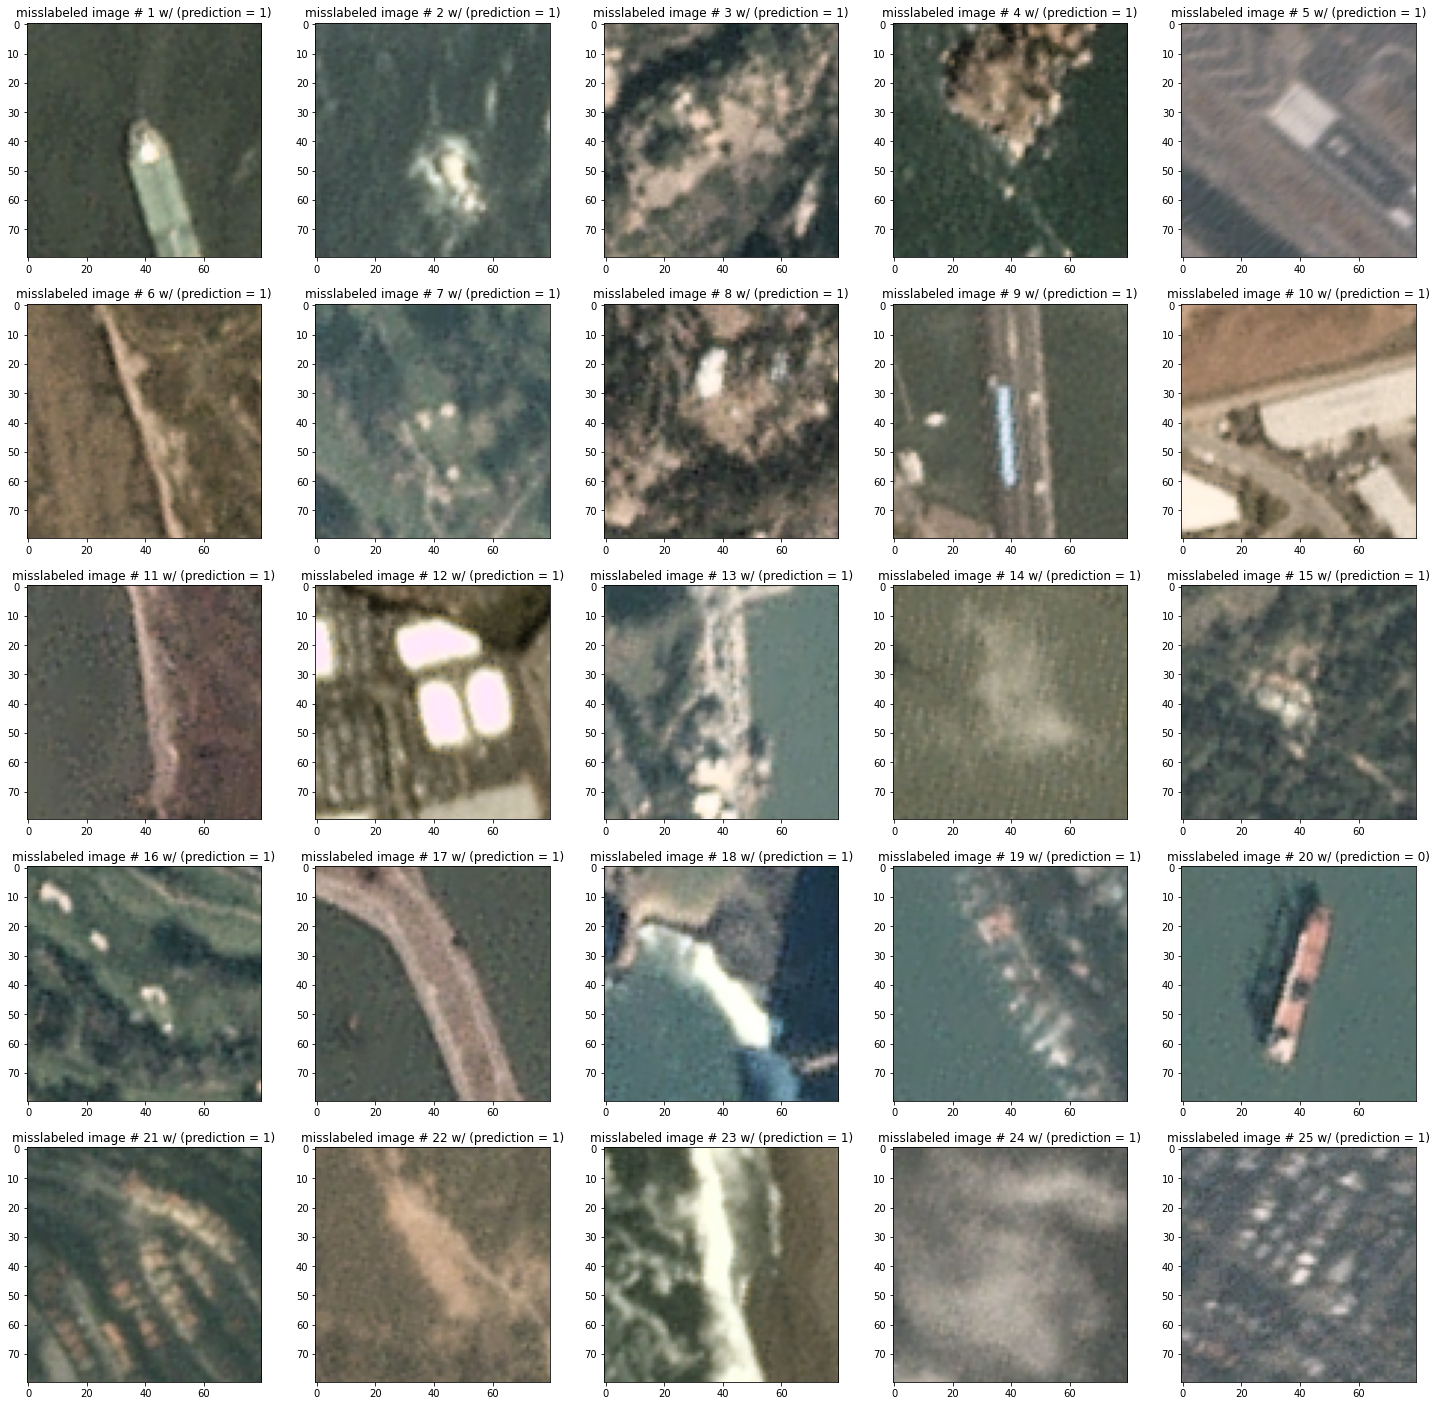

In [38]:
plt.figure(figsize = (25,25))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  pixel_vals = X_test[mislabeled]*255
  arr = np.array(pixel_vals[i]).astype('uint8')
  im = arr.reshape((3, 6400)).T.reshape((80,80,3))
  im = Image.fromarray(im)
  plt.title('misslabeled image # {} w/ (prediction = {})' .format(i+1,mislabeled_value[i]))
  plt.imshow(im)
  

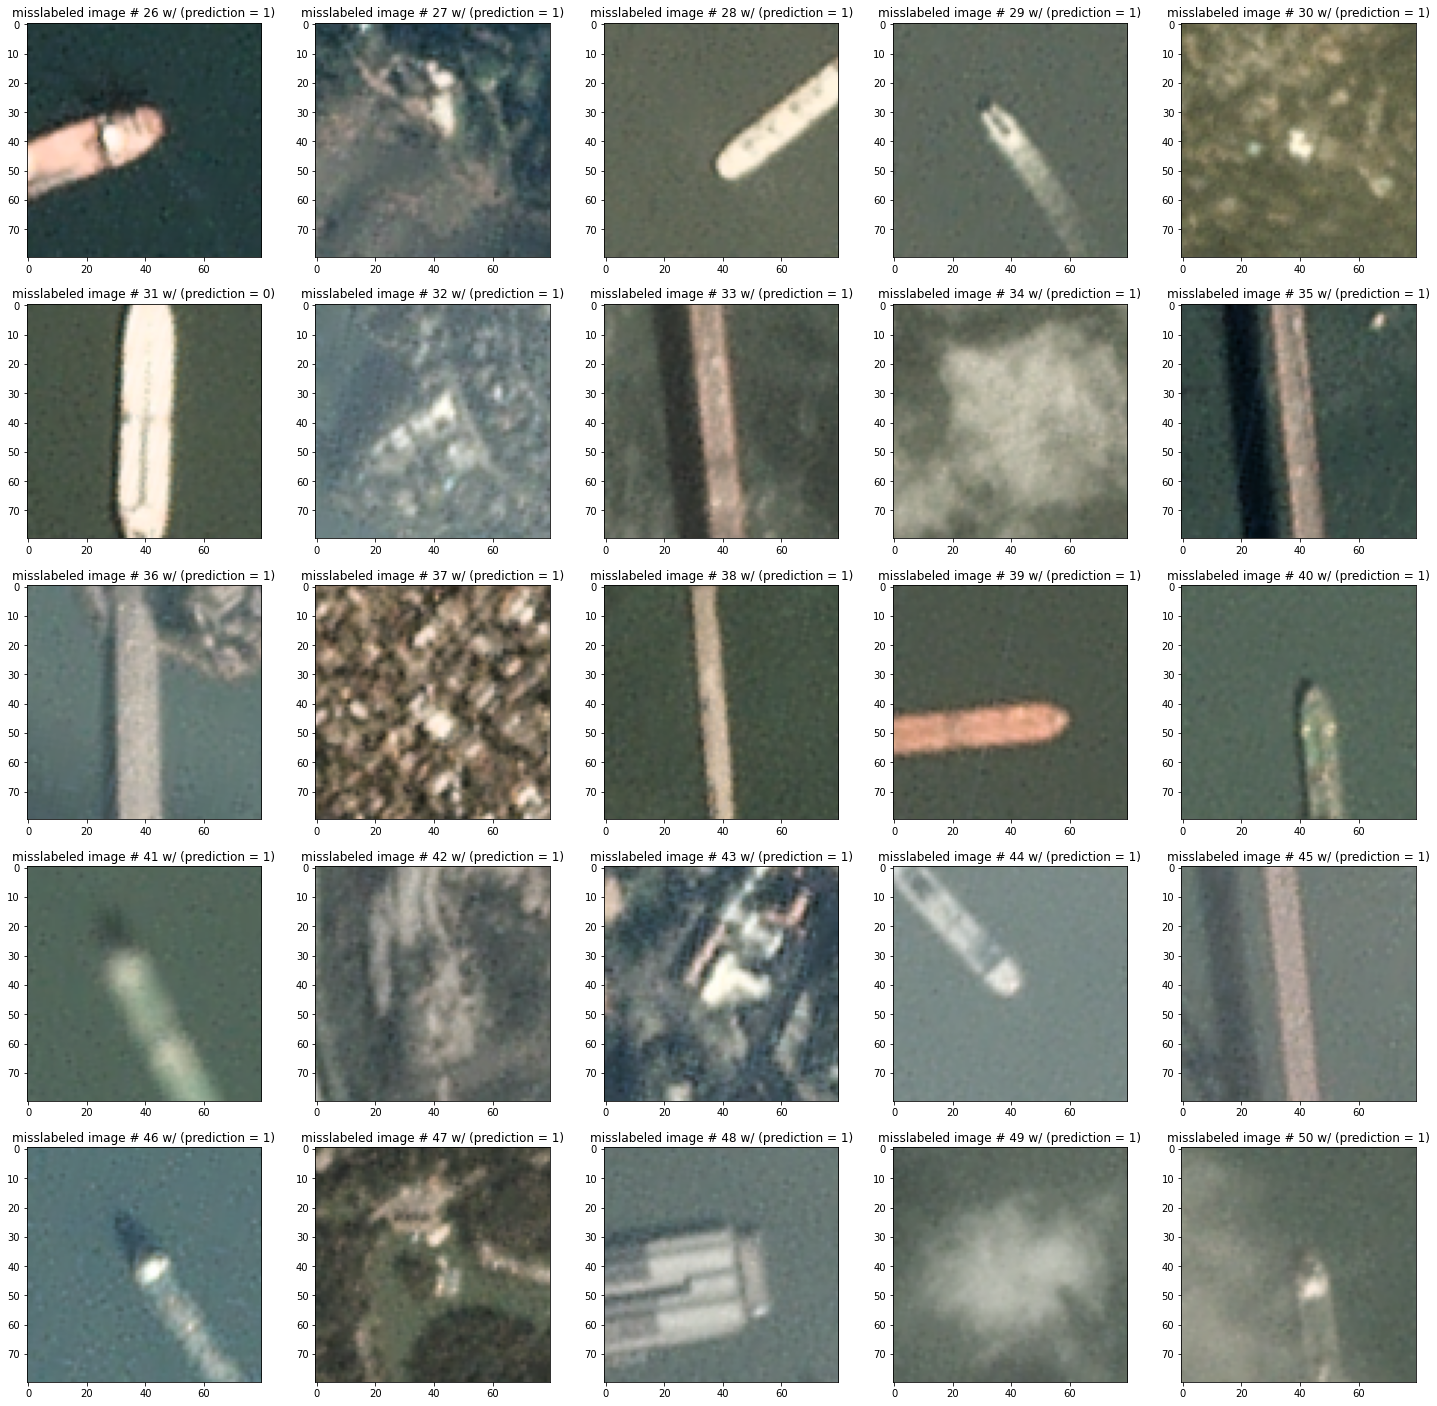

In [39]:
plt.figure(figsize = (25,25))
k = 1
for i in range(26,51):
  plt.subplot(5,5,k)
  k+=1
  pixel_vals = X_test[mislabeled]*255
  arr = np.array(pixel_vals[i]).astype('uint8')
  im = arr.reshape((3, 6400)).T.reshape((80,80,3))
  im = Image.fromarray(im)
  plt.title('misslabeled image # {} w/ (prediction = {})' .format(i,mislabeled_value[i]))
  plt.imshow(im)

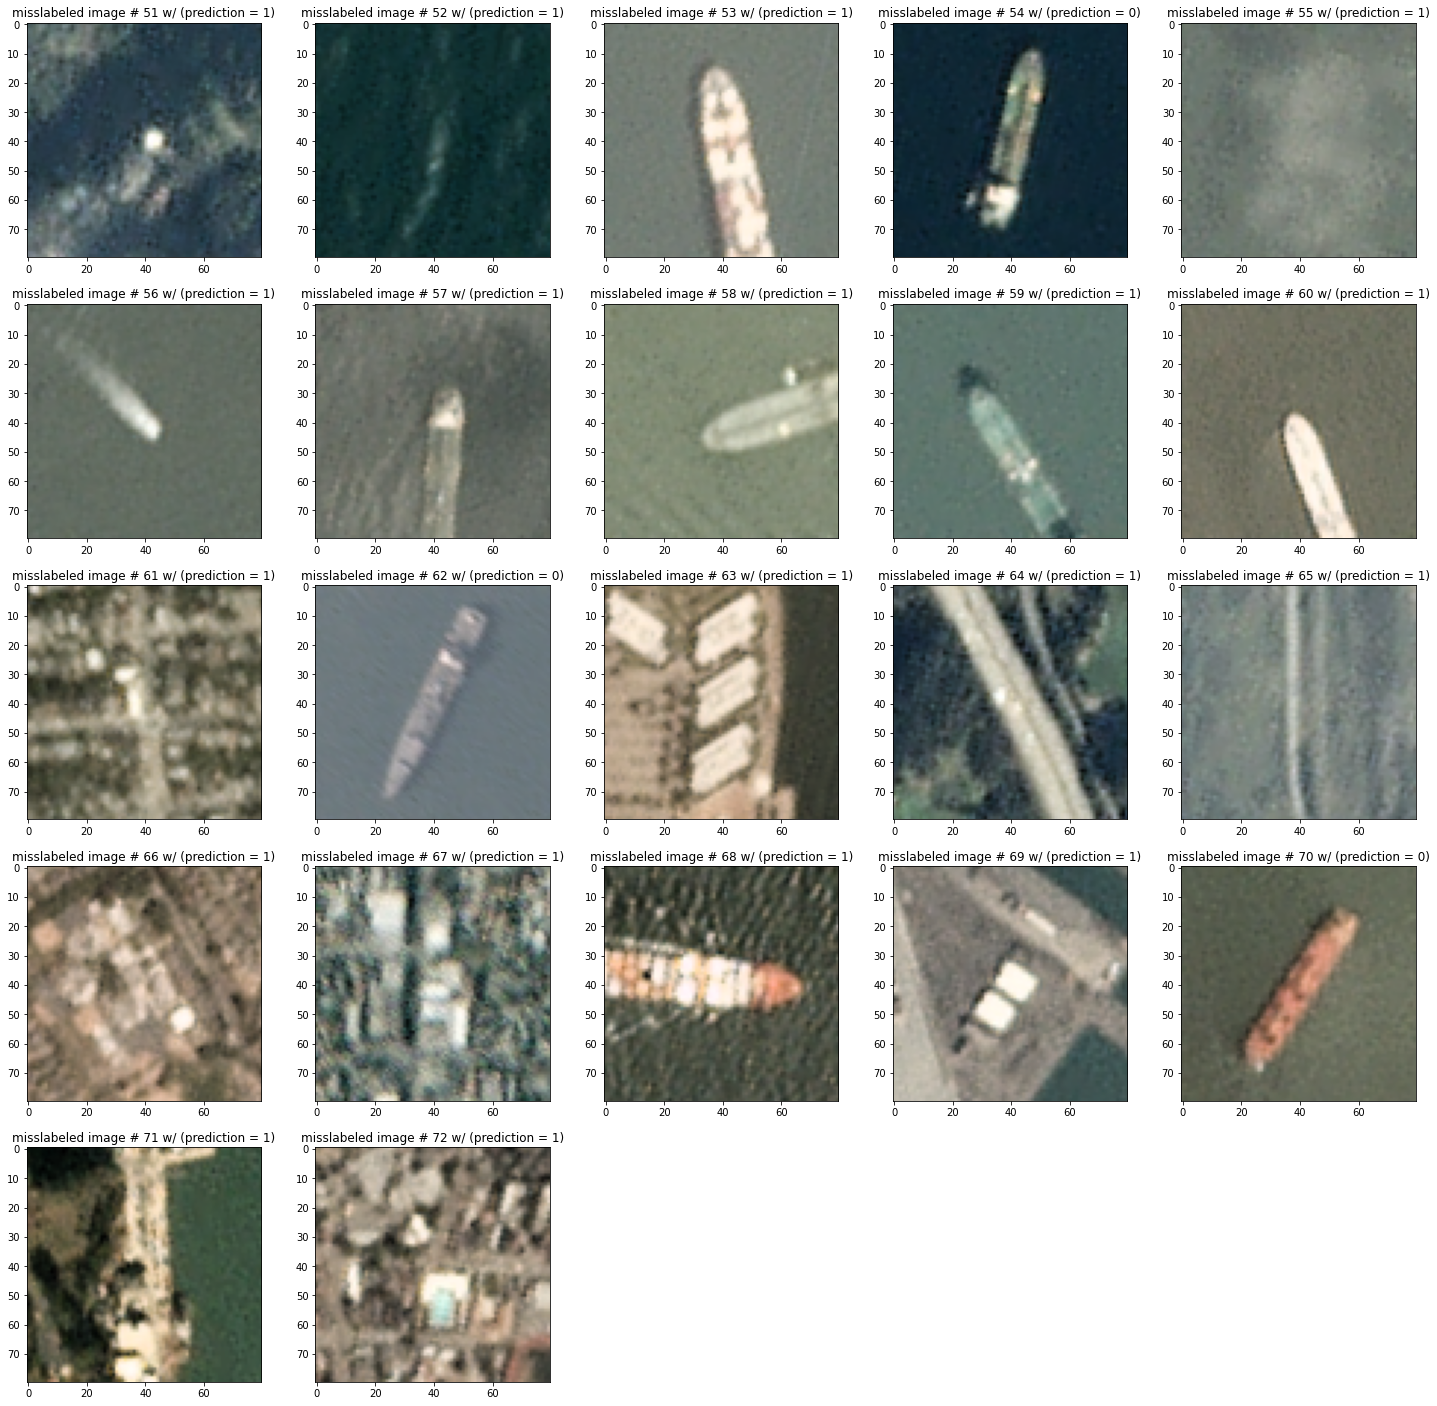

In [40]:
plt.figure(figsize = (25,25))
k = 1
for i in range(51,73):
  plt.subplot(5,5,k)
  k+=1
  pixel_vals = X_test[mislabeled]*255
  arr = np.array(pixel_vals[i]).astype('uint8')
  im = arr.reshape((3, 6400)).T.reshape((80,80,3))
  im = Image.fromarray(im)
  plt.title('misslabeled image # {} w/ (prediction = {})' .format(i,mislabeled_value[i]))
  plt.imshow(im)

# Conclusion

This model is 93% accurate which is a very good score. This model could definitely be used to predict/classify images with ships with confidence. However to build a more accurate model understanding the issues is important. See below:

Based on the 72 mislabeled images above, there are a few common themes that are visibily noticeable for incorrectly labeled data. 
 

1.   First off, some contain ships that are not fully in the image, sometimes only half or a quarter of the ship is there. This could cause the model to show porblems if it is expecting a full ship.
2.   A bridge/road/structure that looks rectangular causes the model to predict "ship". This seems that the model sometimes picks based of a sort of a shape criteria, so if a structure or road has a shaded area that resembles a ship, it may be chosen incorrectly.
3.   A smaller boat or vessle that has a wake behind it. These may have qualities of ships, even if boats or jetskis are not technically "ships"
4.   land masses like islands, hills, or different colored trees that may have an outline that resembles a ships area may also trick the model into thinking it is a ship.
4.   Sandy beaches that have a rectangular like shape could also pose a problem to the model



#Future Work

In the future it would be interesting to explore the images that caused the model to incorrectly labeled. Studying those images could be a way to figure out how to increase model accuracy. Based on the images above there are a few visual signs of possible issues that could cause the code to miss classify images. 

This model can be trained with a larger image data set, to create a more robust model